In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

C:\Users\yadag\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\yadag\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv(r"D:\Data\Deep_Learning\demo_data\4.linearsep.csv", header=None)

In [3]:
data.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [4]:
data.shape
data.info()

(100, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
data.duplicated().value_counts()

False    100
dtype: int64

In [6]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

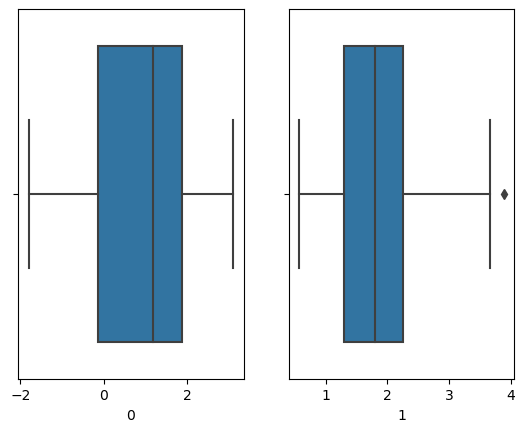

In [7]:
plt.subplot(121)
sns.boxplot(x=data[0])
plt.subplot(122)
sns.boxplot(x=data[1]);

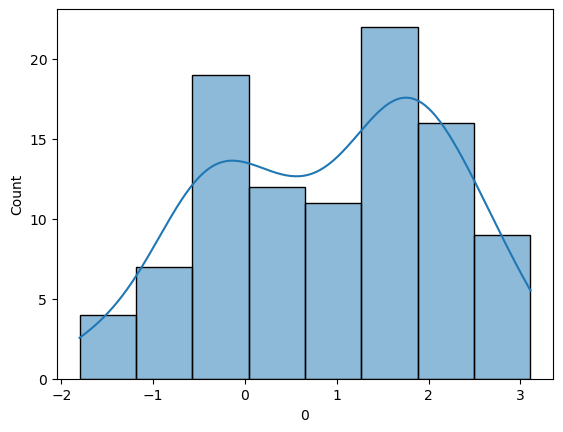

In [8]:
sns.histplot(data[0], kde=True);

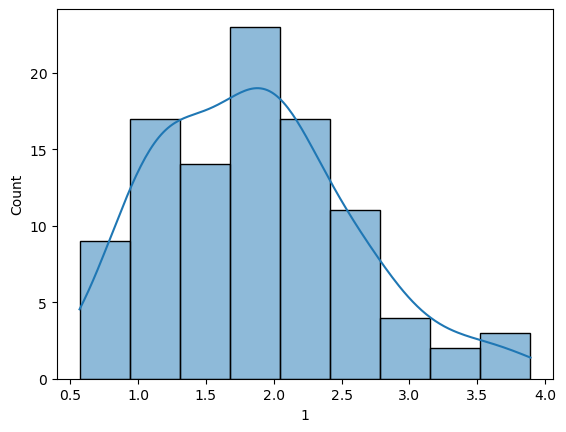

In [9]:
sns.histplot(data[1],kde=True);

In [10]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

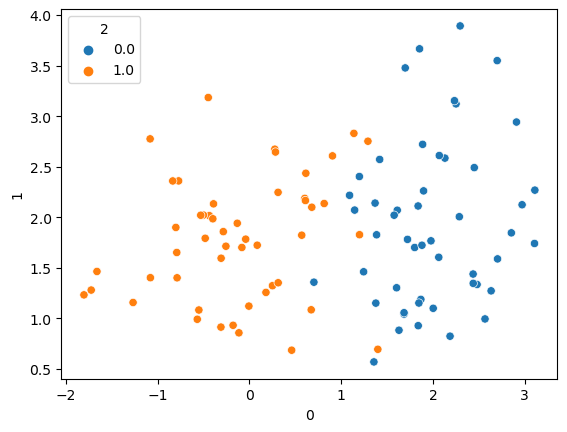

In [11]:
sns.scatterplot(x=data[0], y=data[1], hue=data[2]);

## Splitting the data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[[0,1]],data[2],test_size=0.1)

### Rescaling the features

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_trans = std.fit_transform(x_train)
x_test_trans = std.transform(x_test)

In [14]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

### Buliding the model using sigmoid

In [15]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim = 2))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.get_weights()

[array([[-0.62620306,  0.27112603, -0.0493784 ,  0.8373604 ],
        [-0.258209  , -0.5919707 ,  0.5766492 ,  0.57706165]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.47002292,  0.27686262,  0.653551  ],
        [-0.2505859 , -0.7888484 ,  0.86488664],
        [ 0.4862995 ,  0.59346044, -0.16370445],
        [ 0.79862773, -0.69571155, -0.10509437]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.589739  ,  0.28576565],
        [ 0.8553668 , -0.6453313 ],
        [-0.75204015, -0.64811283]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.05141413],
        [1.3326513 ]], dtype=float32),
 array([0.], dtype=float32)]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 0.7467 - accuracy: 0.4722 - val_loss: 0.7029 - val_accuracy: 0.5556
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7440 - accuracy: 0.4722 - val_loss: 0.7022 - val_accuracy: 0.5556
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7422 - accuracy: 0.4722 - val_loss: 0.7011 - val_accuracy: 0.5556
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7397 - accuracy: 0.4722 - val_loss: 0.6998 - val_accuracy: 0.5556
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7365 - accuracy: 0.4722 - val_loss: 0.6989 - val_accuracy: 0.5556
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7344 - accuracy: 0.4722 - val_loss: 0.6985 - val_accuracy: 0.5556
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7331 - accuracy: 0.4722 - val_loss: 0.6975 - val_accuracy: 0.5556
Epoch 8/50
8/8 [=================

In [20]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 307ms/step


array([[0.5131994 ],
       [0.5188531 ],
       [0.51250094],
       [0.50831056],
       [0.5190662 ],
       [0.5157268 ],
       [0.5136779 ],
       [0.51296145],
       [0.51029104],
       [0.5085217 ]], dtype=float32)

In [21]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.6

In [23]:
val_loss = history.history['val_loss']
loss = history.history['loss']

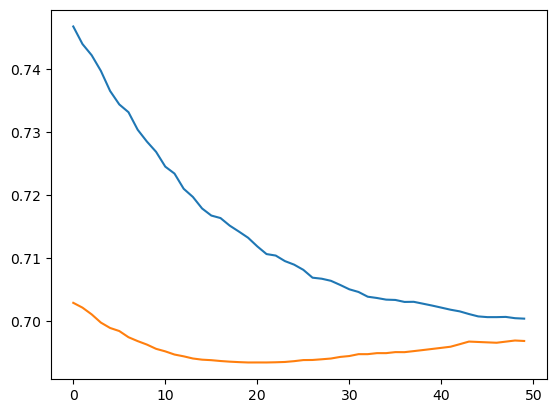

In [24]:
plt.plot(loss)
plt.plot(val_loss)

In [25]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 9s 972us/step


<AxesSubplot: >

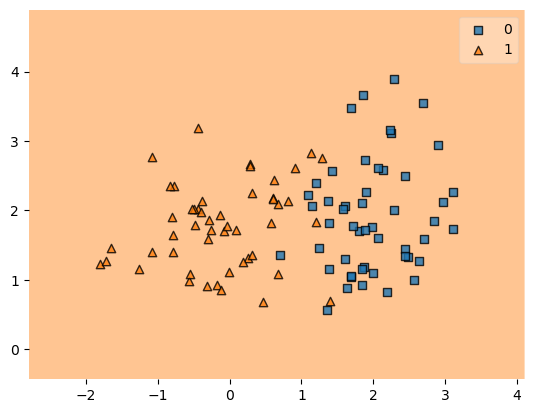

In [26]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 13s 1ms/step


<AxesSubplot: >

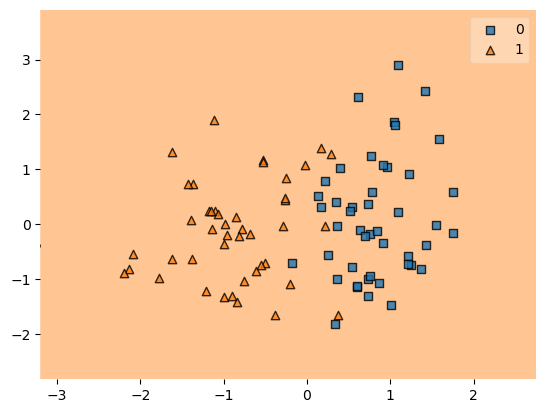

In [27]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 16s 2ms/step


<AxesSubplot: >

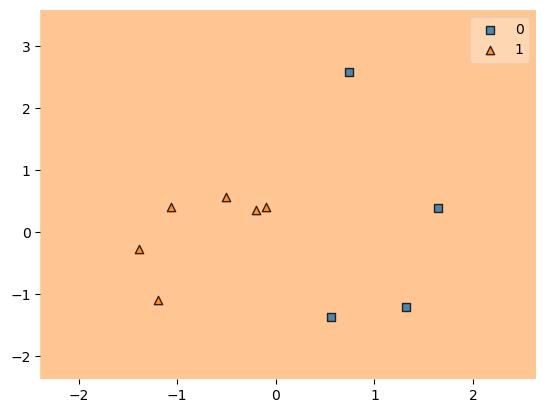

In [28]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the tanh activation func

In [29]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim = 2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='tanh'))

In [30]:
model.get_weights()

[array([[-0.4034263 , -0.8720114 ,  0.58739424],
        [-0.9833658 , -0.69650817, -0.35207152]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.5937525 ,  0.2999314 ],
        [ 0.57798433,  0.4069537 ],
        [ 0.07820344, -0.26800603]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.1032568],
        [-0.236516 ]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 37ms/step - loss: 3.6072 - accuracy: 0.5278 - val_loss: 5.8398 - val_accuracy: 0.4444
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 3.3782 - accuracy: 0.5278 - val_loss: 5.6738 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 3.1657 - accuracy: 0.5278 - val_loss: 4.9587 - val_accuracy: 0.5000
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 3.1174 - accuracy: 0.5278 - val_loss: 4.8694 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 3.0793 - accuracy: 0.5278 - val_loss: 4.8156 - val_accuracy: 0.5000
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 2.9129 - accuracy: 0.5278 - val_loss: 4.2099 - val_accuracy: 0.5000
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 1.7643 - accuracy: 0.5278 - val_loss: 2.7768 - val_accuracy: 0.5000
Epoch 8/50
8/8 [============

In [34]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 116ms/step


array([[ 0.5302351 ],
       [-0.01268868],
       [ 0.6389128 ],
       [ 0.42600837],
       [ 0.11063866],
       [-0.43346822],
       [ 0.48161104],
       [ 0.05465009],
       [ 0.70942783],
       [ 0.5656726 ]], dtype=float32)

In [35]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.8

In [37]:
val_loss = history.history['val_loss']
loss = history.history['loss']

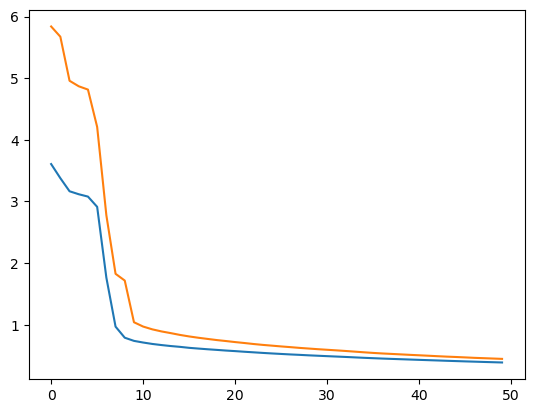

In [38]:
plt.plot(loss)
plt.plot(val_loss)

In [39]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 17s 2ms/step


<AxesSubplot: >

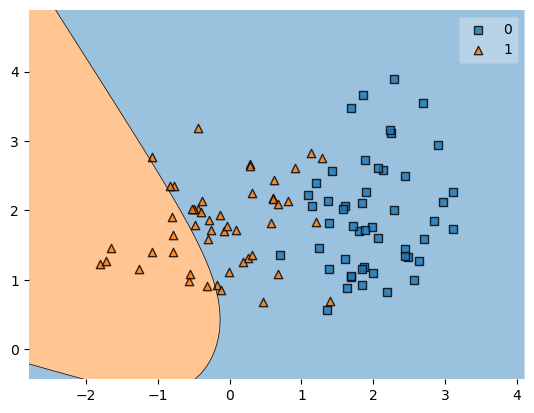

In [40]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 975us/step


<AxesSubplot: >

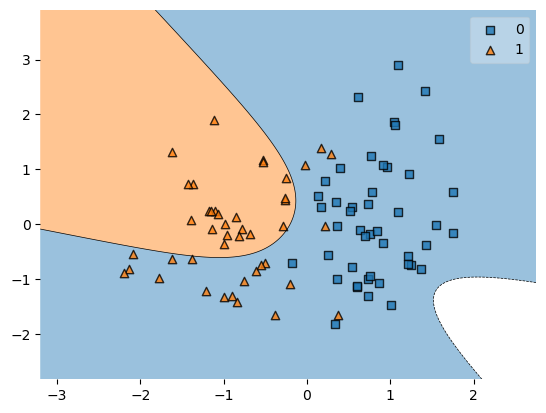

In [41]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

9600/9600 [==============================] - 9s 980us/step


<AxesSubplot: >

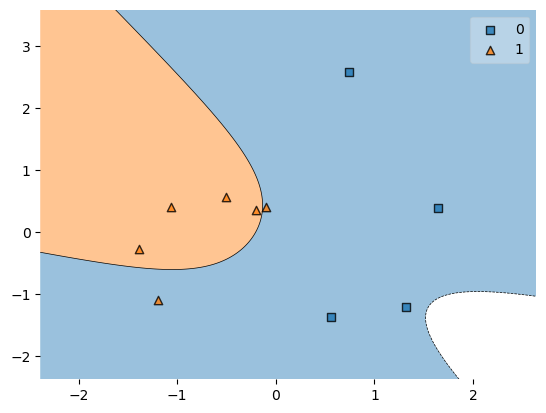

In [42]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

### Buliding the model with the Relu activation func

In [71]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="tanh"))

In [72]:
model.get_weights()

[array([[ 0.68217444,  0.19587839, -0.8717185 ,  0.47844827, -0.67599833],
        [ 0.71370816,  0.05392236, -0.22984302, -0.03722191, -0.8751211 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.7494208 ,  0.5198082 , -0.66880536,  0.6718122 ],
        [-0.27023047, -0.01713294, -0.03776288, -0.0540145 ],
        [-0.09375715,  0.644169  ,  0.19097745,  0.03403109],
        [-0.27612734,  0.702142  , -0.22349769, -0.74547845],
        [ 0.4783007 , -0.69555664, -0.49597698, -0.65107656]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.5835898 ,  0.08386135],
        [-0.26434898,  0.20524931],
        [-0.7723477 ,  0.9769068 ],
        [ 0.47774243,  0.8606663 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.790805 ],
        [-0.0470686]], dtype=float32),
 array([0.], dtype=float32)]

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 dense_16 (Dense)            (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 2)                 10        
                                                                 
 dense_18 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 28ms/step - loss: 1.5591 - accuracy: 0.5278 - val_loss: 1.5669 - val_accuracy: 0.4444
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 1.1371 - accuracy: 0.5278 - val_loss: 1.5221 - val_accuracy: 0.4444
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0215 - accuracy: 0.5278 - val_loss: 0.9507 - val_accuracy: 0.4444
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.9549 - accuracy: 0.5278 - val_loss: 0.8663 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8919 - accuracy: 0.5278 - val_loss: 0.8140 - val_accuracy: 0.5000
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8429 - accuracy: 0.5417 - val_loss: 0.7758 - val_accuracy: 0.5556
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8067 - accuracy: 0.5556 - val_loss: 0.7452 - val_accuracy: 0.5556
Epoch 8/50
8/8 [================

In [76]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 80ms/step


array([[0.27602148],
       [0.04073412],
       [0.31143844],
       [0.9144693 ],
       [0.32676423],
       [0.04576815],
       [0.29506856],
       [0.20585679],
       [0.64303315],
       [0.85318774]], dtype=float32)

In [77]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.7

In [79]:
val_loss = history.history['val_loss']
loss = history.history['loss']

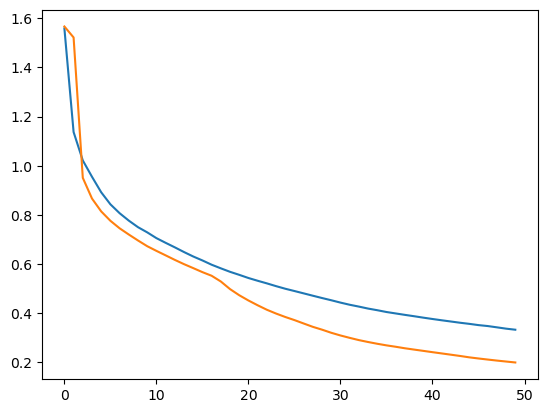

In [80]:
plt.plot(loss)
plt.plot(val_loss)

In [81]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

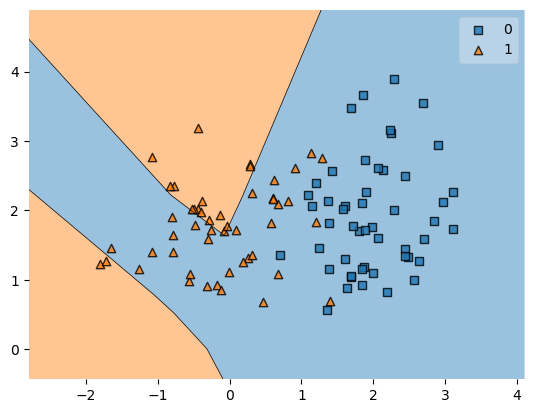

In [82]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 969us/step


<AxesSubplot: >

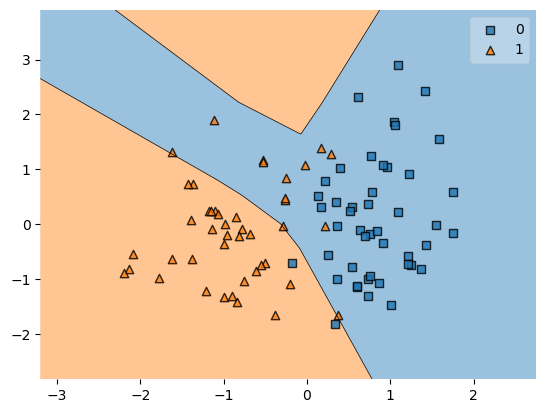

In [83]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 9s 952us/step


<AxesSubplot: >

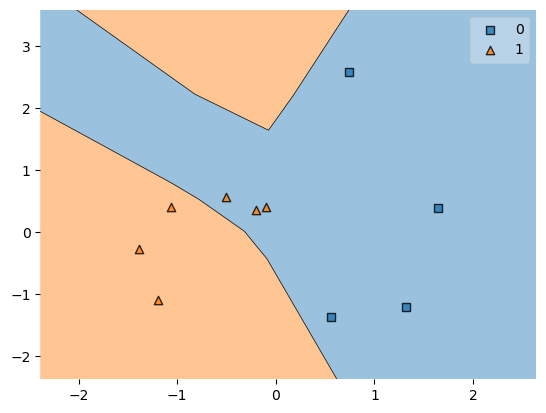

In [84]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

In [85]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="relu"))

In [86]:
model.get_weights()

[array([[-0.509727  ,  0.01696044, -0.01570886,  0.5998857 , -0.5821649 ],
        [ 0.06935376,  0.90080714, -0.915472  , -0.704342  , -0.23898244]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.67929405, -0.2827556 , -0.15683752, -0.6733831 ],
        [ 0.67374635,  0.4965005 ,  0.7340733 , -0.7469022 ],
        [-0.31046033, -0.41274026,  0.69635904,  0.48748696],
        [-0.25699073, -0.38780466, -0.61870325, -0.4105631 ],
        [ 0.08793366, -0.27401346, -0.75937444,  0.5679836 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.52905846,  0.8082721 ],
        [ 0.10547137,  0.5208571 ],
        [ 0.790437  , -0.10251451],
        [ 0.5737686 ,  0.501976  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.69937027],
        [0.9279562 ]], dtype=float32),
 array([0.], dtype=float32)]

In [87]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 5)                 15        
                                                                 
 dense_20 (Dense)            (None, 4)                 24        
                                                                 
 dense_21 (Dense)            (None, 2)                 10        
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 34ms/step - loss: 4.8670 - accuracy: 0.5000 - val_loss: 0.7556 - val_accuracy: 0.6111
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 3.8353 - accuracy: 0.5139 - val_loss: 0.6528 - val_accuracy: 0.6111
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 3.0692 - accuracy: 0.5278 - val_loss: 0.5835 - val_accuracy: 0.6667
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 2.9486 - accuracy: 0.5694 - val_loss: 0.5274 - val_accuracy: 0.6667
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 2.8836 - accuracy: 0.5833 - val_loss: 0.4814 - val_accuracy: 0.6667
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 2.8271 - accuracy: 0.5972 - val_loss: 0.4380 - val_accuracy: 0.7222
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 2.7846 - accuracy: 0.5833 - val_loss: 0.4002 - val_accuracy: 0.7222
Epoch 8/50
8/8 [=================

In [90]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 75ms/step


array([[0.47641224],
       [0.0103041 ],
       [0.7256033 ],
       [1.8423747 ],
       [2.1131117 ],
       [0.0103041 ],
       [0.39016503],
       [0.0103041 ],
       [0.9545705 ],
       [1.458935  ]], dtype=float32)

In [91]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

0.7

In [93]:
val_loss = history.history['val_loss']
loss = history.history['loss']

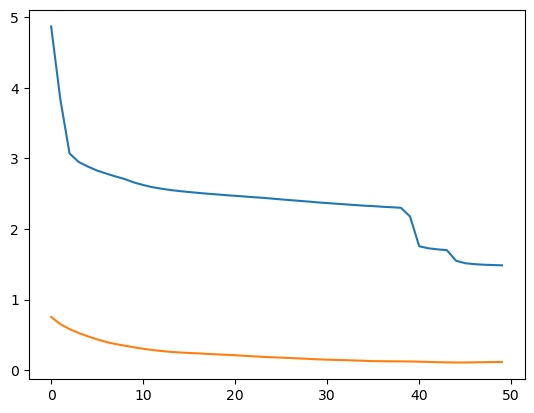

In [94]:
plt.plot(loss)
plt.plot(val_loss)

In [95]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 10s 992us/step


<AxesSubplot: >

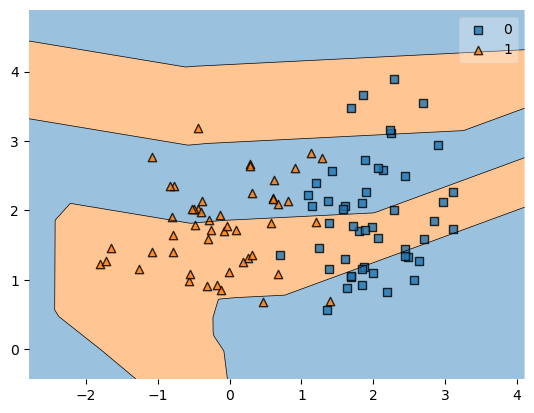

In [96]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 959us/step


<AxesSubplot: >

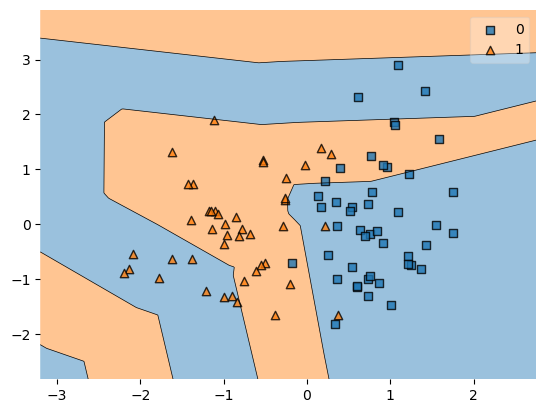

In [97]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 9s 965us/step


<AxesSubplot: >

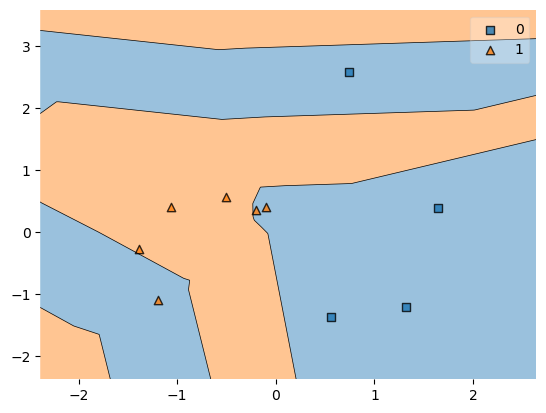

In [98]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)

## relu and sigmoid

In [128]:
model=Sequential()
model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [129]:
model.get_weights()

[array([[ 0.72654724, -0.32323945, -0.03946328, -0.18437165, -0.8115715 ],
        [-0.4830091 , -0.27884525, -0.57009476,  0.42672884, -0.13787276]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.10616255,  0.04328209, -0.16567588,  0.22249222],
        [-0.46017656,  0.1474536 ,  0.11508441, -0.48416588],
        [ 0.6245612 ,  0.6958904 ,  0.4287418 ,  0.04913908],
        [ 0.1922003 , -0.16964126,  0.7153642 ,  0.654937  ],
        [ 0.02948302,  0.25729072, -0.74298257,  0.20570469]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.8858905 , -0.8434713 ],
        [-0.26944494,  0.36595035],
        [ 0.73332334, -0.88742423],
        [ 0.3881023 , -0.9091768 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.14809322],
        [1.0867664 ]], dtype=float32),
 array([0.], dtype=float32)]

In [130]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 5)                 15        
                                                                 
 dense_36 (Dense)            (None, 4)                 24        
                                                                 
 dense_37 (Dense)            (None, 2)                 10        
                                                                 
 dense_38 (Dense)            (None, 1)                 3         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.compile(optimizer='Rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
history = model.fit(x_train_trans,y_train,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 0.6836 - accuracy: 0.4444 - val_loss: 0.6433 - val_accuracy: 0.6111
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6763 - accuracy: 0.4722 - val_loss: 0.6349 - val_accuracy: 0.6111
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6702 - accuracy: 0.5139 - val_loss: 0.6286 - val_accuracy: 0.7222
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6645 - accuracy: 0.5139 - val_loss: 0.6233 - val_accuracy: 0.6667
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.5972 - val_loss: 0.6187 - val_accuracy: 0.6111
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6806 - val_loss: 0.6131 - val_accuracy: 0.7222
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6501 - accuracy: 0.7222 - val_loss: 0.6082 - val_accuracy: 0.7222
Epoch 8/50
8/8 [=================

In [133]:
y_pred = model.predict(x_test_trans)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[0.7126247 ],
       [0.42885065],
       [0.7579782 ],
       [0.96806175],
       [0.4206636 ],
       [0.42390242],
       [0.6727727 ],
       [0.4275884 ],
       [0.88401014],
       [0.9532361 ]], dtype=float32)

In [134]:
y_pred_trans = np.where(y_pred>0.5,1,0)
y_pred_trans

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [135]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_trans)

1.0

In [136]:
val_loss = history.history['val_loss']
loss = history.history['loss']

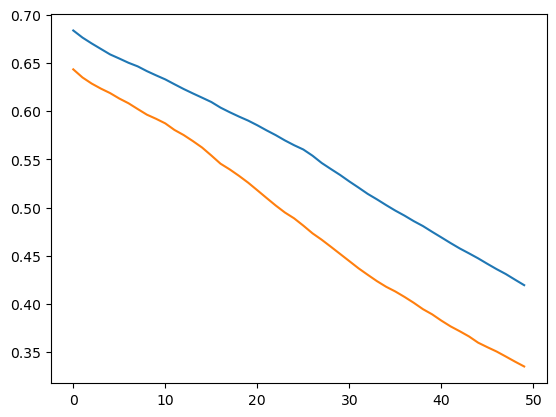

In [137]:
plt.plot(loss)
plt.plot(val_loss)

In [138]:
from mlxtend.plotting import plot_decision_regions

### Decision surface on the original data

9600/9600 [==============================] - 8s 795us/step


<AxesSubplot: >

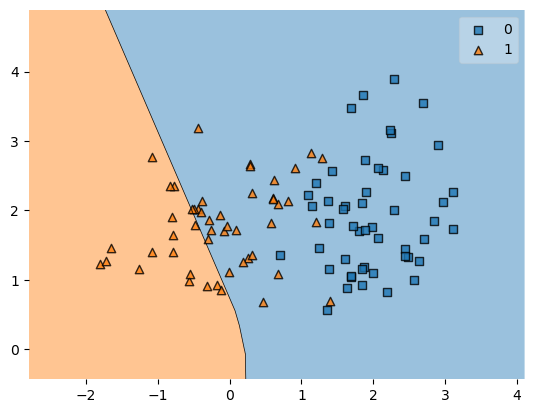

In [139]:
plot_decision_regions(data[[0,1]].values, data[2].values.astype(int), clf=model)

### Decision surface on the train data

9600/9600 [==============================] - 9s 889us/step


<AxesSubplot: >

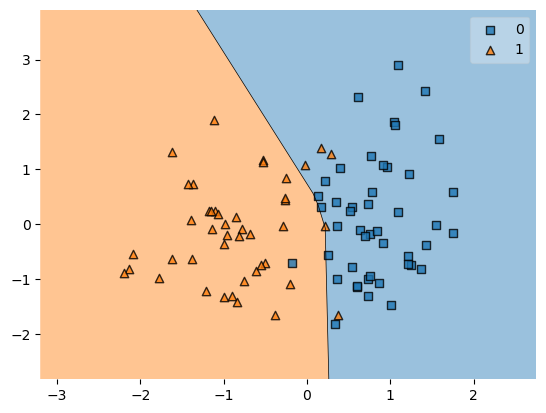

In [140]:
plot_decision_regions(x_train_trans, y_train.values.astype(int), clf=model)

## Desicion Surface on the test data

9600/9600 [==============================] - 9s 984us/step


<AxesSubplot: >

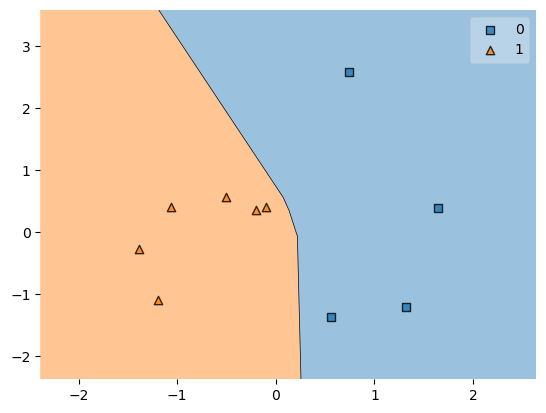

In [141]:
plot_decision_regions(x_test_trans, y_test.values.astype(int), clf=model)